# **Feature Engineering for Machine Learning**

**Today's Outline:**
- Data Preprocessing & Feature Engineering Basics
- Feature Scaling & Transformation
- Feature Encoding (Categorical Data)
- Feature Cleaning & Imputation
- Data Splitting

### Importing Libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Preprocessing & Feature Engineering Basics

- Feature Scaling & Transformation
    - Normalization
    - Standardization
- Feature Encoding (Categorical Data)
    - Label Encoding
    - One-Hot Encoding
- Feature Cleaning & Imputation
    - Outliers
    - Missing Data

### Importing Dataset

In [2]:
df = pd.read_csv('./datasets/feature_data.csv')
df

,First Name,Last Name,Age,Salary,Region,Purchased
0,Ahmed,Radwan,35.0,3000.0,Asia,No
1,Mustafa,Othman,34.0,12000.0,Africa,Yes
2,Omnia,Nasser,28.0,7000.0,Africa,No
3,Saddik,Burhan,45.0,8500.0,Europe,No
4,Mustafa,Jalil,38.0,45000.0,Africa,Yes
5,Hesham,Naser,NaN,NaN,Asia,Yes
6,Abulrahman,NaN,26.0,6700.0,Asia,No
7,Mohamed,Ouda,33.0,10500.0,Asia,Yes
8,Mariam,Mazen,18.0,NaN,Africa,No


### Features Scaling & Transformation

- Normalization (*sklearn.preprocessing.MinMaxScaler*)
- Standardization (*sklearn.preprocessing.StandardScaler*)

##### Normal Distribution


##### Normalization / Scaling (sklearn.preprocessing.MinMaxScaler)


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [5]:
df['Salary']

0     3000.0
1    12000.0
2     7000.0
3     8500.0
4    45000.0
5        NaN
6     6700.0
7    10500.0
8        NaN
Name: Salary, dtype: float64

In [8]:
sc.fit(df[['Salary']])

MinMaxScaler()

In [11]:
sc.transform(df[['Salary']])

array([[0.        ],
       [0.21428571],
       [0.0952381 ],
       [0.13095238],
       [1.        ],
       [       nan],
       [0.08809524],
       [0.17857143],
       [       nan]])

In [17]:
sc.fit_transform(df[['Salary']])


array([[0.        ],
       [0.21428571],
       [0.0952381 ],
       [0.13095238],
       [1.        ],
       [       nan],
       [0.08809524],
       [0.17857143],
       [       nan]])

##### Standardization (sklearn.preprocessing.StandardScaler)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()

In [22]:
sc.fit_transform(df[['Salary']])

array([[-0.77372619],
       [-0.09388309],
       [-0.4715737 ],
       [-0.35826652],
       [ 2.39887492],
       [        nan],
       [-0.49423514],
       [-0.20719028],
       [        nan]])

### Encoding Categorical Features

- Label / Integer Encoding (*sklearn.preprocessing.LabelEncoder*)
- One-Hot / Dummy Encoding (*sklearn.preprocessing.OneHotEncoder*)

##### Label / Integer Encoding (sklearn.preprocessing.LabelEncoder)

In [23]:
from sklearn.preprocessing import LabelEncoder

In [25]:
df

,First Name,Last Name,Age,Salary,Region,Purchased
0,Ahmed,Radwan,35.0,3000.0,Asia,No
1,Mustafa,Othman,34.0,12000.0,Africa,Yes
2,Omnia,Nasser,28.0,7000.0,Africa,No
3,Saddik,Burhan,45.0,8500.0,Europe,No
4,Mustafa,Jalil,38.0,45000.0,Africa,Yes
5,Hesham,Naser,NaN,NaN,Asia,Yes
6,Abulrahman,NaN,26.0,6700.0,Asia,No
7,Mohamed,Ouda,33.0,10500.0,Asia,Yes
8,Mariam,Mazen,18.0,NaN,Africa,No


In [28]:
enc = LabelEncoder()

In [29]:
enc.fit_transform(df[['Region']])

c:\Users\omarr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 0, 2, 0, 1, 1, 1, 0])

In [30]:
enc.fit_transform(df[['Purchased']])


c:\Users\omarr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, 0, 1, 1, 0, 1, 0])

##### One-Hot / Dummy Encoding (sklearn.preprocessing.OneHotEncoder)

In [31]:
from sklearn.preprocessing import OneHotEncoder 

In [32]:
enc = OneHotEncoder()

In [33]:
df

,First Name,Last Name,Age,Salary,Region,Purchased
0,Ahmed,Radwan,35.0,3000.0,Asia,No
1,Mustafa,Othman,34.0,12000.0,Africa,Yes
2,Omnia,Nasser,28.0,7000.0,Africa,No
3,Saddik,Burhan,45.0,8500.0,Europe,No
4,Mustafa,Jalil,38.0,45000.0,Africa,Yes
5,Hesham,Naser,NaN,NaN,Asia,Yes
6,Abulrahman,NaN,26.0,6700.0,Asia,No
7,Mohamed,Ouda,33.0,10500.0,Asia,Yes
8,Mariam,Mazen,18.0,NaN,Africa,No


In [35]:
enc.fit_transform(df[['Region']]).toarray()

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [36]:
pd.get_dummies(df['Region'])

,Africa,Asia,Europe
0,0,1,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0
6,0,1,0
7,0,1,0
8,1,0,0


In [38]:
pd.get_dummies(df['Purchased'],drop_first=True)


,Yes
0,0
1,1
2,0
3,0
4,1
5,1
6,0
7,1
8,0


### Features Cleaning & Imputation


- Missing Data
- Outliers

##### Handling Missing Data

In [39]:
from sklearn.impute import SimpleImputer    

In [42]:
imp = SimpleImputer()

In [40]:
df

,First Name,Last Name,Age,Salary,Region,Purchased
0,Ahmed,Radwan,35.0,3000.0,Asia,No
1,Mustafa,Othman,34.0,12000.0,Africa,Yes
2,Omnia,Nasser,28.0,7000.0,Africa,No
3,Saddik,Burhan,45.0,8500.0,Europe,No
4,Mustafa,Jalil,38.0,45000.0,Africa,Yes
5,Hesham,Naser,NaN,NaN,Asia,Yes
6,Abulrahman,NaN,26.0,6700.0,Asia,No
7,Mohamed,Ouda,33.0,10500.0,Asia,Yes
8,Mariam,Mazen,18.0,NaN,Africa,No


In [43]:
imp.fit_transform(df[['Salary']])

array([[ 3000.        ],
       [12000.        ],
       [ 7000.        ],
       [ 8500.        ],
       [45000.        ],
       [13242.85714286],
       [ 6700.        ],
       [10500.        ],
       [13242.85714286]])

In [44]:
from sklearn.impute import MissingIndicator

In [45]:
miss = MissingIndicator()

In [46]:
miss.fit_transform(df[['Salary']])

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True]])

In [47]:
df[miss.fit_transform(df[['Salary']])]

,First Name,Last Name,Age,Salary,Region,Purchased
5,Hesham,Naser,NaN,NaN,Asia,Yes
8,Mariam,Mazen,18.0,NaN,Africa,No


##### Dealing with Outliers

In [48]:
df

,First Name,Last Name,Age,Salary,Region,Purchased
0,Ahmed,Radwan,35.0,3000.0,Asia,No
1,Mustafa,Othman,34.0,12000.0,Africa,Yes
2,Omnia,Nasser,28.0,7000.0,Africa,No
3,Saddik,Burhan,45.0,8500.0,Europe,No
4,Mustafa,Jalil,38.0,45000.0,Africa,Yes
5,Hesham,Naser,NaN,NaN,Asia,Yes
6,Abulrahman,NaN,26.0,6700.0,Asia,No
7,Mohamed,Ouda,33.0,10500.0,Asia,Yes
8,Mariam,Mazen,18.0,NaN,Africa,No


<AxesSubplot:>

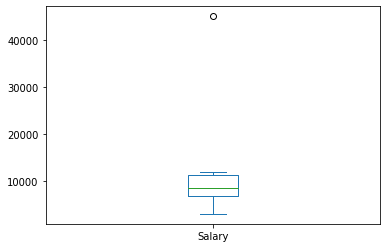

In [54]:
df['Salary'].plot.box()

In [56]:
q1 = df['Salary'].quantile(0.25)
q1

6850.0

In [57]:
q3 = df['Salary'].quantile(0.75)
q3

11250.0

In [60]:
df.describe().round(1)

,Age,Salary
count,8.0,7.0
mean,32.1,13242.9
std,8.2,14299.1
min,18.0,3000.0
25%,27.5,6850.0
50%,33.5,8500.0
75%,35.8,11250.0
max,45.0,45000.0


In [62]:
iqr = q3  - q1
iqr

4400.0

In [63]:
min_out = q1 - 1.5 * iqr
min_out

250.0

In [65]:
max_out = q3 + 1.5 * iqr
max_out

17850.0

In [68]:
df = df[(df['Salary'] >= min_out) & (df['Salary'] <= max_out)]
df

,First Name,Last Name,Age,Salary,Region,Purchased
0,Ahmed,Radwan,35.0,3000.0,Asia,No
1,Mustafa,Othman,34.0,12000.0,Africa,Yes
2,Omnia,Nasser,28.0,7000.0,Africa,No
3,Saddik,Burhan,45.0,8500.0,Europe,No
6,Abulrahman,NaN,26.0,6700.0,Asia,No
7,Mohamed,Ouda,33.0,10500.0,Asia,Yes


<AxesSubplot:>

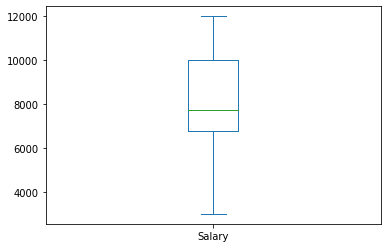

In [69]:
df['Salary'].plot.box()

### Splitting Data for Training & Testing

In [70]:
from sklearn.model_selection import train_test_split

In [74]:
from sklearn.datasets import load_iris

In [75]:
iris = load_iris()

In [77]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [82]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [81]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [83]:
X, y = iris.data, iris.target

In [85]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [86]:
X_train

array([[5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.7, 4.2, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [7.7, 3.8, 6.7, 2.2],
       [4.6, 3.2, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.5, 5. , 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [6. , 3. , 4.8, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 2.2, 4. , 1. ],
       [5.4, 3. , 4.5, 1.5],
       [6.2, 3.4, 5.4, 2.3],
       [5.5, 2.3, 4. , 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 2.3, 3.3, 1. ],
       [6.4, 2.7, 5.3, 1.9],
       [5. , 3.3, 1.4, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 2.4, 3.8, 1.1],
       [6.7, 3

In [87]:
y_train

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0,
       2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [88]:
X_test

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3

In [89]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])